In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df =df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['petal length (cm)','petal width (cm)']])
df['cluster'] = y_predicted

In [6]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [7]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [8]:
df.cluster.unique()

array([1, 2, 0])

In [9]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]

In [10]:
import matplotlib.pyplot as plt

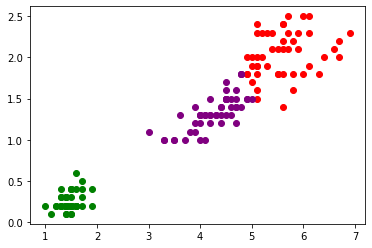

In [11]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color = 'red')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'green')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'purple')

In [12]:
df

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


In [16]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit_predict(df[['petal length (cm)']],df[['petal width (cm)']])
    sse.append(km.inertia_)

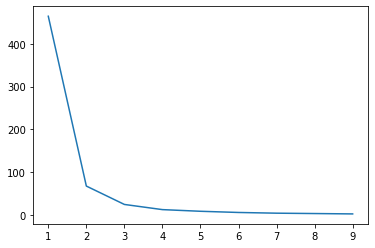

In [17]:
plt.plot(k_rng,sse)